In [41]:
import pandas as pd

## Carregamento dos Dados

### Arquivos Disponíveis
- `hour.csv` - Contagem de bicicletas alugadas por hora (17.379 registros).
- `day.csv` - Contagem de bicicletas alugadas por dia (731 registros).

### Características do Conjunto de Dados
Os arquivos `hour.csv` e `day.csv` possuem os seguintes campos (exceto `hr`, que não está presente em `day.csv`):

- `instant`: índice do registro
- `dteday`: data
- `season`: estação do ano (1: primavera, 2: verão, 3: outono, 4: inverno)
- `yr`: ano (0: 2011, 1: 2012)
- `mnth`: mês (1 a 12)
- `hr`: hora do dia (0 a 23, apenas em `hour.csv`)
- `holiday`: indica se o dia é feriado (dados obtidos de [dchr.dc.gov](http://dchr.dc.gov/page/holiday-schedule))
- `weekday`: dia da semana
- `workingday`: indica se é um dia útil (1: dia útil, 0: fim de semana ou feriado)
- `weathersit`: situação climática:
  - 1: Céu limpo, poucas nuvens, parcialmente nublado
  - 2: Neblina + nublado, neblina + poucas nuvens
  - 3: Neve leve, chuva leve + trovoada + nuvens dispersas
  - 4: Chuva forte + tempestade, neve + neblina
- `temp`: temperatura normalizada (valores divididos por 41, temperatura máxima em Celsius)
- `atemp`: temperatura aparente normalizada (valores divididos por 50)
- `hum`: umidade normalizada (valores divididos por 100)
- `windspeed`: velocidade do vento normalizada (valores divididos por 67)
- `casual`: contagem de usuários ocasionais
- `registered`: contagem de usuários registrados
- `cnt`: total de bicicletas alugadas (casual + registered)


In [42]:
# Carregar o dataset
df = pd.read_csv("./data/hour.csv")

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [44]:
print(df.isnull().sum())
print(f"Dimensões do dataset: {df.shape}")

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Dimensões do dataset: (17379, 17)


## Seleção de Variáveis Relevantes

Removi colunas desnecessárias, como instant (índice do registro) e dteday (data), pois já tenho variáveis temporais separadas (mnth, hr, weekday, etc.). Também removi casual e registered, pois a variável alvo é cnt (total de bicicletas alugadas).

In [45]:
# Remover colunas desnecessárias
df = df.drop(columns=["instant", "dteday", "casual", "registered"])

# Verificar as colunas restantes
print(df.columns)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


## Codificação de Variáveis Categóricas

As variáveis categóricas (season, weathersit, holiday, workingday) precisam ser codificadas para que possam ser usadas no modelo. Utilizei a técnica de one-hot encoding.

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Lista de variáveis categóricas
categorical_features = ['season', 'weathersit', 'holiday', 'workingday']

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Verificar o resultado
print(df_encoded.head())

   yr  mnth  hr  weekday  temp   atemp   hum  windspeed  cnt  season_2  \
0   0     1   0        6  0.24  0.2879  0.81        0.0   16     False   
1   0     1   1        6  0.22  0.2727  0.80        0.0   40     False   
2   0     1   2        6  0.22  0.2727  0.80        0.0   32     False   
3   0     1   3        6  0.24  0.2879  0.75        0.0   13     False   
4   0     1   4        6  0.24  0.2879  0.75        0.0    1     False   

   season_3  season_4  weathersit_2  weathersit_3  weathersit_4  holiday_1  \
0     False     False         False         False         False      False   
1     False     False         False         False         False      False   
2     False     False         False         False         False      False   
3     False     False         False         False         False      False   
4     False     False         False         False         False      False   

   workingday_1  
0         False  
1         False  
2         False  
3         Fals

##  Normalização de Variáveis Numéricas

As variáveis numéricas (temp, atemp, hum, windspeed, hr, mnth, weekday) foram normalizadas para que tenham a mesma escala.

In [47]:
from sklearn.preprocessing import StandardScaler

# Lista de variáveis numéricas
numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'hr', 'mnth', 'weekday']

# Aplicar normalização
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Verificar o resultado
print(df_encoded.head())

   yr      mnth        hr   weekday      temp     atemp       hum  windspeed  \
0   0 -1.610438 -1.670004  1.493891 -1.334648 -1.093281  0.947372  -1.553889   
1   0 -1.610438 -1.525374  1.493891 -1.438516 -1.181732  0.895539  -1.553889   
2   0 -1.610438 -1.380744  1.493891 -1.438516 -1.181732  0.895539  -1.553889   
3   0 -1.610438 -1.236115  1.493891 -1.334648 -1.093281  0.636370  -1.553889   
4   0 -1.610438 -1.091485  1.493891 -1.334648 -1.093281  0.636370  -1.553889   

   cnt  season_2  season_3  season_4  weathersit_2  weathersit_3  \
0   16     False     False     False         False         False   
1   40     False     False     False         False         False   
2   32     False     False     False         False         False   
3   13     False     False     False         False         False   
4    1     False     False     False         False         False   

   weathersit_4  holiday_1  workingday_1  
0         False      False         False  
1         False      Fal

## Divisão dos Dados em Treino e Teste
Separando 80% dos dados para treino e 20% para teste, utilizando random_state=42.

In [48]:
from sklearn.model_selection import train_test_split

# Definir variáveis preditoras (X) e variável alvo (y)
X = df_encoded.drop(columns=["cnt"])
y = df_encoded["cnt"]

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Verificar o tamanho dos conjuntos
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Treino: (13903, 16), Teste: (3476, 16)


### Salvamento dos Conjuntos de Teste
Salvando os dados de teste em arquivos CSV.

In [ ]:
# Salvar conjuntos de teste
X_test.to_csv("./conjunto_teste/bike_test_features.csv", index=False)
y_test.to_csv("./conjunto_teste/bike_test_target.csv", index=False)


## Construção da Rede Neural MLP**

#### Definição da Arquitetura**

A rede neural MLP (Multilayer Perceptron) será composta por:

1. **Camadas de entrada**: O número de neurônios na camada de entrada será igual ao número de features (variáveis preditoras) após o pré-processamento.
2. **Camadas ocultas**: Utilizei duas camadas ocultas com um número razoável de neurônios (64 e 32).
3. **Camada de saída**: A camada de saída terá **1 neurônio**, pois estou resolvendo um problema de regressão (previsão de um valor contínuo).

As funções de ativação serão:
- **Camadas ocultas**: `ReLU` (Rectified Linear Unit).
- **Camada de saída**: `Linear`, usado para lidar com regressão.

#### Escolha do Otimizador e Função de Perda**

- **Otimizador**: `Adam` (Adaptive Moment Estimation).
- **Função de perda**: `Mean Squared Error (MSE)`.

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Definir a arquitetura do modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Camada de entrada explícita
    Dense(64, activation='relu'),      # Primeira camada oculta
    Dense(32, activation='relu'),      # Segunda camada oculta
    Dense(1, activation='linear')      # Camada de saída (regressão)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibir resumo do modelo
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

## **Treinamento do Modelo**

### Treinamento Básico

In [51]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=50,               # Número de épocas
    batch_size=32,           # Tamanho do batch
    validation_split=0.2,    # Separa 20% dos dados de treino para validação
    verbose=1                # Exibe o progresso do treinamento
)

Epoch 1/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 58200.0430 - val_loss: 20623.1406
Epoch 2/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 19584.8086 - val_loss: 19902.0488
Epoch 3/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19960.2520 - val_loss: 19563.6953
Epoch 4/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19196.8047 - val_loss: 19555.7188
Epoch 5/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19551.5996 - val_loss: 19306.2344
Epoch 6/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19504.2695 - val_loss: 19255.4297
Epoch 7/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20020.2734 - val_loss: 19219.3145
Epoch 8/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18826.7246 - val_loss: 19137.1035
Epoch 9/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18952.5078 - val_loss: 19060.0137
Epoch 10/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19247.1016 - val_loss: 18791.5996
Epoch 11/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

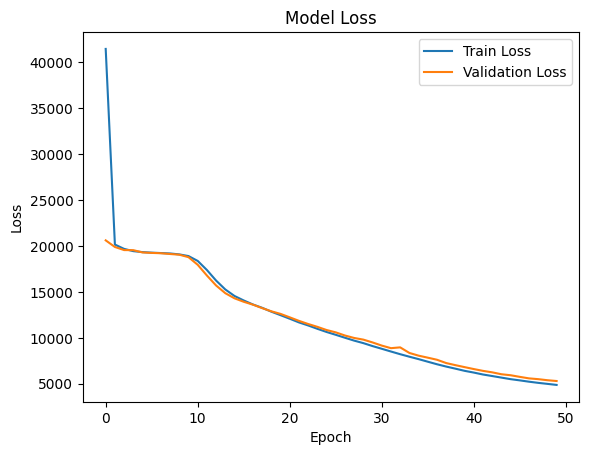

In [52]:
import matplotlib.pyplot as plt

# Plotar a perda de treino e validação
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Ajuste de Hiperparâmetros

- Número de camadas ocultas.
- Número de neurônios por camada.
- Taxa de aprendizado.
- Número de épocas.
- Tamanho do batch.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Definir uma nova arquitetura com mais camadas
model_tuned = Sequential([
    Input(shape=(X_train.shape[1],)),  # Camada de entrada explícita
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compilar o modelo com uma taxa de aprendizado personalizada
model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o modelo ajustado
history_tuned = model_tuned.fit(
    X_train, y_train,
    epochs=100,              # Mais épocas
    batch_size=64,           # Batch maior
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 56436.3125 - val_loss: 20593.6152
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20876.0840 - val_loss: 19619.6855
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19202.1660 - val_loss: 19089.4688
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18984.6543 - val_loss: 17897.3340
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17427.9082 - val_loss: 15810.8926
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15540.2021 - val_loss: 14069.5029
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13797.6865 - val_loss: 13104.5283
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12437.6660 - val_loss: 12011.5186
Epoch 9/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11624.1260 - val_loss: 11091.8086
Epoch 10/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10872.8711 - val_loss: 10612.8916
Epoch 11/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

## Uso de Callbacks

Parar salvar o melhor modelo durante o treinamento.

In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping: Interrompe o treinamento se a validação não melhorar após 10 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Checkpoint: Salva o melhor modelo durante o treinamento
model_checkpoint = ModelCheckpoint('./melhor_modelo/best_model.keras', monitor='val_loss', save_best_only=True)

# Treinar o modelo com callbacks
history_tuned = model_tuned.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1288.8352 - val_loss: 2104.2192
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1420.6726 - val_loss: 2052.6843
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1413.1899 - val_loss: 2096.2637
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1382.9006 - val_loss: 2307.2732
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1381.5012 - val_loss: 2305.4902
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1440.2671 - val_loss: 2046.3790
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1376.8939 - val_loss: 1989.0828
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1391.0262 - val_loss: 2195.6792
Epoch 9/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1267.6443 - val_loss: 2027.3235
Epoch 10/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1387.0604 - val_loss: 2072.4050
Epoch 11/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1401.30

## **5. Avaliação no Conjunto de Teste**

### Carregamento do Conjunto de Teste

In [55]:
# Carregar conjuntos de teste
X_test = pd.read_csv("./conjunto_teste/bike_test_features.csv")
y_test = pd.read_csv("./conjunto_teste/bike_test_target.csv")

### Fazendo Previsões no Conjunto de Teste

In [56]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Cálculo das Métricas
Calculando as métricas de avaliação: MAE, MSE, RMSE e R².

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Exibir resultados
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Médio Absoluto (MAE): 46.84
Erro Quadrático Médio (MSE): 4769.16
Raiz do Erro Quadrático Médio (RMSE): 69.06
Coeficiente de Determinação (R²): 0.85


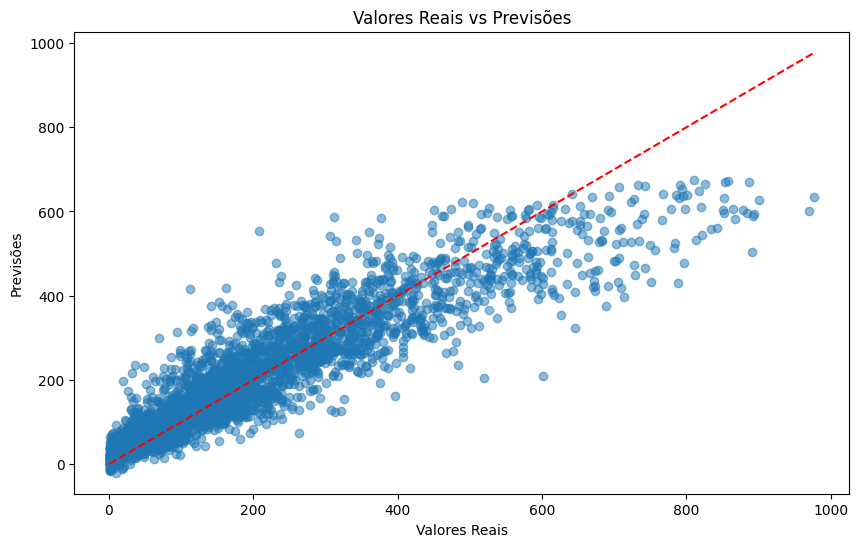

In [58]:
import matplotlib.pyplot as plt

# Plotar valores reais vs previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.show()

## Análise Geral
Desempenho do Modelo:
- O modelo tem um bom poder de explicação (R² = 0.85), o que significa que ele captura bem a relação entre as variáveis preditoras e o número de bicicletas alugadas.
- No entanto, os erros absolutos (MAE = 46.84 e RMSE = 69.06) sugerem que há espaço para melhorias, especialmente na redução de erros maiores.